<a href="https://colab.research.google.com/github/chandanareddy1201/INFO-5731---Computational-Methods-for-Information-Systems/blob/main/Nagireddigari_Chandana_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
data = pd.read_csv('sentimental_analysis.csv')  # Replace 'sentimental_analysis.csv' with the path to your dataset

# Text representation using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english', max_df=0.5, min_df=10)
X = vectorizer.fit_transform(data['Review Title'])

# Features (text representation) used for topic modeling
print("Features (text representation) used for topic modeling:")
print(vectorizer.get_feature_names_out())

# Topic modeling using LDA
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=42)
lda.fit(X)

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower()) # Tokenization and lowercase conversion
    tokens = [token for token in tokens if token.isalnum()] # Remove non-alphanumeric tokens
    tokens = [token for token in tokens if token not in stop_words] # Remove stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens] # Lemmatization
    return ' '.join(tokens)

data['clean_text'] = data['Review Title'].apply(preprocess_text)

# Function to print top words for each topic and summarize/describe the topic
def display_topics(model, feature_names):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx+1))
        top_words = [feature_names[i] for i in topic.argsort()[::-1]]
        print("Top words:", top_words)
        summarize_topic(topic_idx, top_words)


# Summarize and describe the topic for each cluster (topic)
def summarize_topic(topic_idx, top_words):
    print("Summary:")
    # Combine the top words into a single string for easier analysis
    topic_summary = ' '.join(top_words)

    # You can manually inspect the top words and assign a summary based on your understanding of the words
    # Provide a description or summary of the topic based on the top words
    if 'positive' in topic_summary or 'great' in topic_summary or 'good' in topic_summary:
        print("Description: This topic seems to be about positive sentiments or experiences.")
    elif 'negative' in topic_summary or 'bad' in topic_summary or 'poor' in topic_summary:
        print("Description: This topic seems to be about negative sentiments or experiences.")
    else:
        print("Description: This topic seems to cover a specific aspect or theme related to the data.")
    print()
# Print top 10 clusters (topics) for topic modeling
print("\nTop 10 Clusters (Topics) for Topic Modeling:")
display_topics(lda, vectorizer.get_feature_names_out())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Features (text representation) used for topic modeling:
['absolutely' 'adaptation' 'amazing' 'beautiful' 'best' 'better' 'book'
 'cinema' 'cinematic' 'cinematography' 'classic' 'denis' 'disappointed'
 'dune' 'epic' 'experience' 'fi' 'fiction' 'film' 'films' 'generation'
 'good' 'great' 'greatest' 'imax' 'incredible' 'just' 'like' 'live' 'long'
 'masterpiece' 'movie' 'movies' 'perfect' 'perfection' 'review' 'sci'
 'science' 'seen' 'sequel' 'spectacle' 'spectacular' 'star' 'story'
 'stunning' 'time' 've' 'villeneuve' 'visually' 'wars' 'watch' 'wow']

Top 10 Clusters (Topics) for Topic Modeling:

Topic 1:
Top words: ['amazing', 'review', 'adaptation', 'perfection', 'dune', 'better', 'spectacular', 'time', 'best', 'book', 've', 'disappointed', 'just', 'long', 'cinema', 'movie', 'masterpiece', 'film', 'generation', 'spectacle', 'imax', 'epic', 'denis', 'perfect', 'cinematic', 'absolutely', 'great', 'star', 'wars', 'sequel', 'greatest', 'incredible', 'experience', 'stunning', 'villeneuve', '

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

1.

2)1.TF-IDF is indispensable in sentiment analysis as it enables one both to identify significant words that will help in sentiment expression and to group together common texts that contain these words. Through putting under a spot light the words which are more infrequently found in the text, the TF-IDF vector model helps models to pay closer attention to these words that are more prone and a good chance to affect the sentiment of the text. Like that, words such as “great” or “terrible” will perhaps be spotted less often on the documents, but the positive or negative emotions they portray are powerful. TF-IDF is also able to assign more influence to these terms as evidenced by the higher number they get, thereby, making them more effective during the decision-making process of the model.
This may result to TF-IDF being very relevant to feature extraction in any task where sentiment is analysed because the effect of the terms is high upon the sentiments their often expressed.


Classifier: Logistic Regression
Accuracy: 0.6700
Precision: 0.7596
Recall: 0.6700
F1 Score: 0.6435
Mean Cross-Validation Accuracy: 0.6763

Classifier: Multinomial Naive Bayes
Accuracy: 0.6250
Precision: 0.6743
Recall: 0.6250
F1 Score: 0.5817
Mean Cross-Validation Accuracy: 0.5787


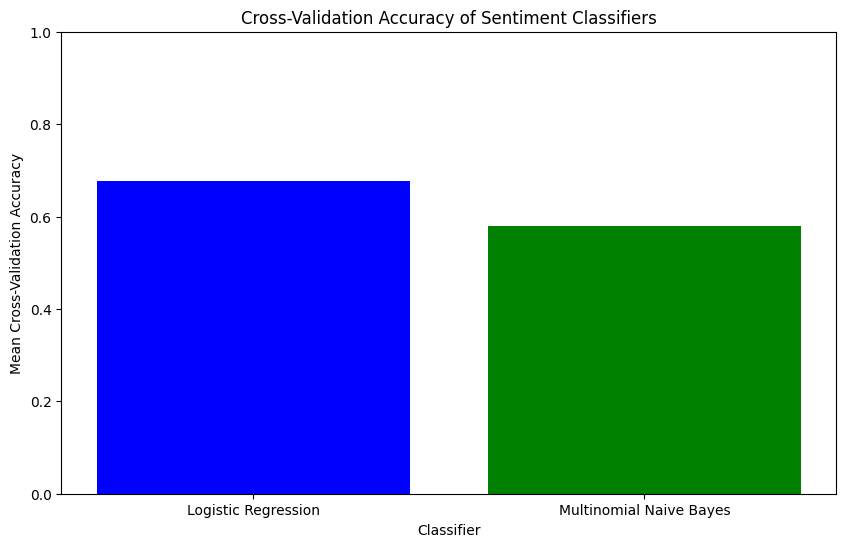

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('sentimental_analysis.csv')  # Replace 'sentimental_analysis.csv' with the path to your dataset

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['Review Title'], data['sentiment_category'], test_size=0.2, random_state=42)

# Save train and test CSV files
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, stop_words='english', max_df=0.5, min_df=10)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define classifiers and a dictionary to hold cross-validation results
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Multinomial Naive Bayes': MultinomialNB()
}
cv_accuracy = {}  # Dictionary to store CV accuracies

# Perform 5-fold cross-validation for each classifier and evaluate performance
for clf_name, clf in classifiers.items():
    print(f"\nClassifier: {clf_name}")

    # Train the classifier
    clf.fit(X_train_tfidf, y_train)

    # Predict on test set
    y_pred = clf.predict(X_test_tfidf)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_tfidf, y_train, cv=5)
    cv_accuracy[clf_name] = cv_scores.mean()  # Store the mean CV accuracy
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(cv_accuracy.keys(), cv_accuracy.values(), color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy of Sentiment Classifiers')
plt.ylim(0, 1)
plt.show()


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

3)2.The relationship between the selected variable is important, which must be strongly related to the SalePrice being the target variable. The connection may be deduced by looking at data preliminary analysis (EDA), which involves such visualization tools and statistical parameters like Pearson correlation coefficients. Here’s why the selected features from this example are typically chosen:
OverallQual: For most cases, this develops a general feel for the level and even of the quality of the house from the exteriors. The blissful condition was the important sign to evaluate the house quality that plays a crucial role in property price. The houses that are higher in quality in terms of the overall quality have higher prices to their selling price.

GrLivArea: Values above indicate the sizes of living space below the ground level per square feet. Size of the house is the indicative way to know its dimensions. Homes of larger size area often more expensive than smaller houses because these provide a greater area and use for the owner.

GarageCars: In this case, the garage area units must be obtained. An appending garage can have a significant appreciating effect on the home value as it is not only a space for storage but also a feature that ensures drivable cars are safely and conveniently stored.

TotalBsmtSF: That is for how square feet of the basements. Vice versa, basements can be spotted as multiple function rooms, including extra living area, keeping stuffs & watching a football game, which also give the house utilization and life.

FullBath: The number of full bathrooms in the house has real importance because it offers an edge in comfort and convenience of living. More bathrooms typically mean the space can accommodate more number of people whereas having more number of bathroom increases the house's market value by facilitating family life and making hosting easy.

In [8]:
 import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Step 1: Exploratory Data Analysis (EDA) and Data Cleaning
# Load the dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Handle missing values in training data
train_data.dropna(axis=1, inplace=True)

# Encode categorical variables in training data
encoder = LabelEncoder()
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train_data[col] = encoder.fit_transform(train_data[col])

# Extract numeric columns for imputation
numeric_cols = test_data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
test_data_imputed_numeric = pd.DataFrame(imputer.fit_transform(test_data[numeric_cols]), columns=numeric_cols)

# Concatenate numeric columns with non-numeric columns
non_numeric_cols = [col for col in test_data.columns if col not in numeric_cols]
test_data_imputed = pd.concat([test_data_imputed_numeric, test_data[non_numeric_cols]], axis=1)

# Step 2: Feature Selection
# Based on EDA results or any other criteria, select a subset of features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']

# Step 3: Split Data for Training (Not needed for test set prediction)
X_train = train_data[selected_features]
y_train = train_data['SalePrice']

# Step 4: Regression Model Development
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
X_test = test_data_imputed[selected_features]
y_pred = model.predict(X_test)



# Prepare predictions for submission
submission_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_pred})
submission_df.to_csv("submission.csv", index=False)
print(train_data.info())
print(train_data.describe())
print(train_data.isnull().sum())
predictions_df = pd.read_csv("submission.csv")

# Print the DataFrame
print(submission_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int64
 3   LotArea        1460 non-null   int64
 4   Street         1460 non-null   int64
 5   LotShape       1460 non-null   int64
 6   LandContour    1460 non-null   int64
 7   Utilities      1460 non-null   int64
 8   LotConfig      1460 non-null   int64
 9   LandSlope      1460 non-null   int64
 10  Neighborhood   1460 non-null   int64
 11  Condition1     1460 non-null   int64
 12  Condition2     1460 non-null   int64
 13  BldgType       1460 non-null   int64
 14  HouseStyle     1460 non-null   int64
 15  OverallQual    1460 non-null   int64
 16  OverallCond    1460 non-null   int64
 17  YearBuilt      1460 non-null   int64
 18  YearRemodAdd   1460 non-null   int64
 19  RoofSt

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


4)1.The "Robustly optimized BERT approach", also known as RoBERTa by its abbreviation form, is a BERT variant brought to life by Facebook AI. It was applied on a larger data set that included different datasets such BookCorpus, CC-News, OpenWebText and Stories which improved its language skills accordingly. The model called "roberta-base" has 125 million parameters. It is proficient in a multitude of NLP types, and it lends itself well to zero-shot classification, wherein the model can identify categories of the texts without task-specific training, relying only on the immense breadth of its pretraining.

3.Advantages
Enhanced Training Data and Techniques: Unlike the original BERT model that was trained on a significantly smaller data set, RoBERTa was fed with a dataset that was wider in terms of domain and the level of diversity, and this is a trend towards improving its language comprehension abilities. That diversity found in the process of word formation makes the algorithm better with text of various kinds as input.

Robustness and Generalization: From the numerous texts it has been broadly pre-trained on, RoBERTa inherently tends to feature more robustness, making it easy to adapt to a variety of datasets unlike in the cases where its training set is different from the normal type of data. It lets us address such tasks which can have really diverse input data - this is the case in zero-shot classification problems.

Disadvantages
Computational Resources: Taking into account 125 million parameters RoBERTa trains with a lot of powerful machinery to be implemented in devices with limited resources for deployment usability.

Fine-Tuning Complexity: Although RoBERTa is a good zero-shot learner, fine-tuning it on specific tasks inevitably become complex and the battle for the resources. It calls into existence a perfectly skilled hand that should be able to tune the hyperparameters efficiently and involve a lot of computational resources to get the best results.

Model Size and Latency: The size of the model could be the main reason for longer real-time latency which in turn is a crucial point when you are working on the interactive scenarios with the applications that require timely interaction.

Challenges in Implementation
Handling of Context and Bias: Relying on one of the largest public corpora as a training data like RoBERTa may result in transmission and reinforcement of biases or negative stereotypes within that data. Such biases should be particularly focused when they are involved in applications with sensitive information.


Integration with Existing Systems: It as an improper attempt to implement this big model into the production systems that can already be challenging in view of its size and the computational resources it requires.

Debugging and Interpretation: Parsing out the problems with predictions and understanding the learnings of the model becomes straining in case a deep learning model behaves like a "black box". Thereby, it can lead to even more difficulties in downstream tasks such as troubleshooting and better model improvement.

In [11]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load RoBERTa for sentiment analysis
classifier = pipeline("zero-shot-classification", model="roberta-base")

# Load dataset from CSV
dataset_path = "sentimental_analysis.csv"  # Update with the path to your CSV file
dataset = pd.read_csv(dataset_path)

# Extract text data and ground truth labels
text_data = dataset["Review Title"].tolist()
ground_truths = dataset["sentiment_category"].tolist()

# Predict sentiment polarities using RoBERTa
predictions = classifier(text_data, candidate_labels=["positive", "negative", "neutral"])

# Extract predicted labels
predicted_labels = [pred['labels'][0] for pred in predictions]

# Calculate performance metrics
accuracy = accuracy_score(ground_truths, predicted_labels)
precision = precision_score(ground_truths, predicted_labels, average='weighted')
recall = recall_score(ground_truths, predicted_labels, average='weighted')
f1 = f1_score(ground_truths, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


Accuracy: 0.152
Precision: 0.5493253641485416
Recall: 0.152
F1 Score: 0.09454256261978256
